In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train = df_train.fillna(-1)

In [6]:
train_res = pd.DataFrame()
train_res['Survived'] = df_train['Survived']
train_arr = pd.DataFrame()
train_arr['Pclass'] = df_train['Pclass']
train_arr['Sex'] = df_train['Sex']
train_arr['Age'] = df_train['Age']
train_arr['SibSp'] = df_train['SibSp']
train_arr['Parch'] = df_train['Parch']
train_arr['Fare'] = df_train['Fare']
train_arr['Embarked'] = df_train['Embarked']
train_arr['Cabin'] = df_train['Cabin']
print(train_arr, train_res)

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked Cabin
0         3    male  22.0      1      0   7.2500        S    -1
1         1  female  38.0      1      0  71.2833        C   C85
2         3  female  26.0      0      0   7.9250        S    -1
3         1  female  35.0      1      0  53.1000        S  C123
4         3    male  35.0      0      0   8.0500        S    -1
..      ...     ...   ...    ...    ...      ...      ...   ...
886       2    male  27.0      0      0  13.0000        S    -1
887       1  female  19.0      0      0  30.0000        S   B42
888       3  female  -1.0      1      2  23.4500        S    -1
889       1    male  26.0      0      0  30.0000        C  C148
890       3    male  32.0      0      0   7.7500        Q    -1

[891 rows x 8 columns]      Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [7]:
set(train_arr['Embarked'])

{-1, 'C', 'Q', 'S'}

In [8]:
train_arr['Embarked'] = pd.factorize(train_arr['Embarked'])[0]

In [9]:
set(train_arr['Embarked'])

{0, 1, 2, 3}

In [10]:
train_arr['Cabin'] = pd.factorize(train_arr['Cabin'])[0]

In [11]:
set(train_arr['Cabin'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147}

In [12]:
train_arr['Sex'] = pd.factorize(train_arr['Sex'])[0]

In [13]:
set(train_arr['Sex'])

{0, 1}

Pclass
Sex
Age
SibSp
Parch
Fare
Embarked
Cabin


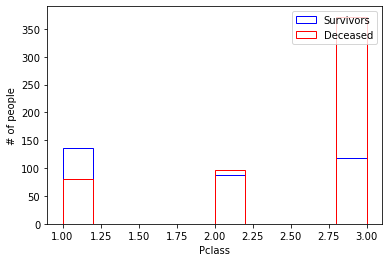

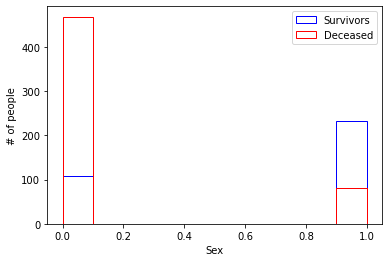

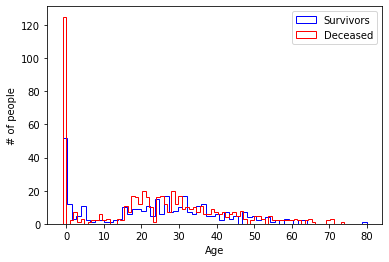

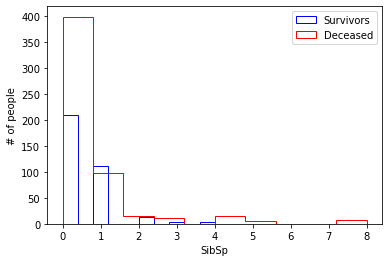

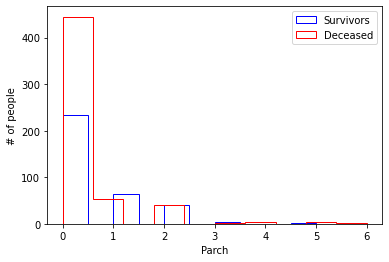

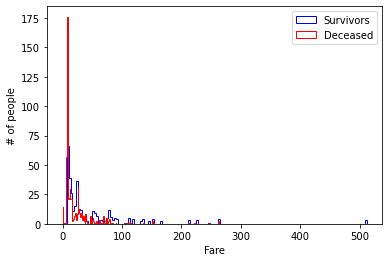

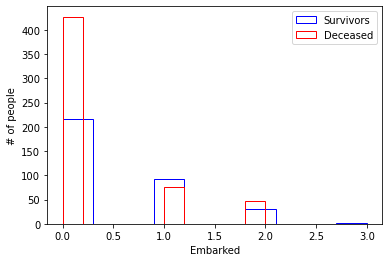

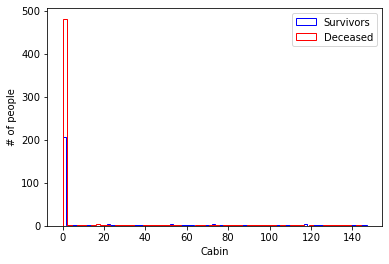

In [14]:
train_keys = train_arr.keys()
for key in train_keys: 
    print(key)
    plt.figure()
    living = train_arr[key][train_res['Survived'] == 1]
    dead = train_arr[key][train_res['Survived'] == 0]
    plt.hist(living, bins=max(len(set(living)), 10), color='b', histtype='step', label='Survivors')
    plt.hist(dead, bins=max(len(set(dead)), 10), color='r', histtype='step', label='Deceased')
    plt.xlabel(key)
    plt.ylabel('# of people')
    plt.legend()

In [15]:
train_arr, train_res

(     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Cabin
 0         3    0  22.0      1      0   7.2500         0      0
 1         1    1  38.0      1      0  71.2833         1      1
 2         3    1  26.0      0      0   7.9250         0      0
 3         1    1  35.0      1      0  53.1000         0      2
 4         3    0  35.0      0      0   8.0500         0      0
 ..      ...  ...   ...    ...    ...      ...       ...    ...
 886       2    0  27.0      0      0  13.0000         0      0
 887       1    1  19.0      0      0  30.0000         0    146
 888       3    1  -1.0      1      2  23.4500         0      0
 889       1    0  26.0      0      0  30.0000         1    147
 890       3    0  32.0      0      0   7.7500         2      0
 
 [891 rows x 8 columns],
      Survived
 0           0
 1           1
 2           1
 3           1
 4           0
 ..        ...
 886         0
 887         1
 888         0
 889         1
 890         0
 
 [891 rows x 1 columns]

# Now we can start with the machine learning.

In [16]:
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from scipy.spatial import cKDTree
from sklearn.model_selection import train_test_split as array_split
from titanic_ml import *

6/6 [==============================] - 0s 2ms/step - loss: 0.5990 - binary_accuracy: 0.7989
INFO:tensorflow:Assets written to: Models/titanic_reg.f5\assets


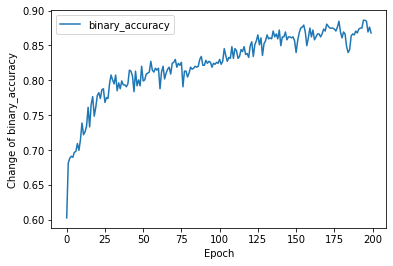

Survived    0.383838
dtype: float64


In [18]:
new_models = True
retrain_num = 1
reg_loc = 'Models/titanic_reg.f5'
reg_mat = train_arr #np.asarray(train_arr)
reg_vec = train_res #np.asarray(train_res)
reg_mat_train, reg_mat_test, reg_vec_train, reg_vec_test = array_split(reg_mat, reg_vec, test_size=0.2, random_state=986178946)

tot_history = np.array([])
lab = 'binary_accuracy'

if new_models:
    for i in range(retrain_num):
        rate = 1e-3
        if i == 0:
            model_reg = tf_regression(reg_mat_train, rate=rate)
            history = model_reg.fit(reg_mat_train, reg_vec_train, epochs=200, verbose=0, shuffle=True)
            tot_history = np.append(tot_history, history.history[lab])
            model_reg.evaluate(reg_mat_test, reg_vec_test, verbose=1)
            model_reg.save(reg_loc)
        else:
            rate /= 10
            model_reg = recompile(reg_loc, rate=rate)
            history = model_reg.fit(reg_mat_train, reg_vec_train, epochs=100, verbose=0, shuffle=True)
            tot_history = np.append(tot_history, history.history[lab])
            model_reg.evaluate(reg_mat_test, reg_vec_test, verbose=1)
            model_reg.save(reg_loc)

    #plot_metric(history, metric='binary_accuracy')
    plot_tot_history(tot_history, label=lab)
else:
    model_reg = recompile(reg_loc, rate=1e-7)
    history = model_reg.fit(reg_mat_train, reg_vec_train, epochs=100, verbose=0, shuffle=True)
    model_reg.evaluate(reg_mat_test, reg_vec_test, verbose=1)
    model_reg.save(reg_loc)
    plot_metric(history, metric='binary_accuracy')

print(np.mean(reg_vec), )